## 機器學習應用於分類（Classification）問題

$\blacksquare$  k-Means，原理簡介




In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

建立簡單的資料集，裡面有一群紅點和黃點。

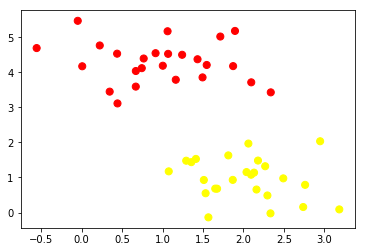

In [19]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

我們可用簡單的直線將其劃分，例如以下三個分類器（Classifier），每個分類器皆可將紅黃點完美分開。

假設今天有一新資料點ｘ（紅色），它會被不同的分類器分類到紅或黃點。因此分類器單純地將資料分開還不夠。

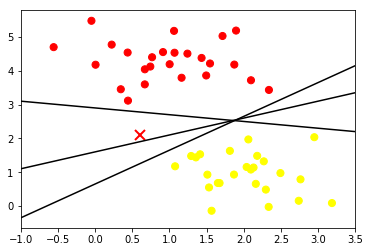

In [20]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

因此我們進一步將，三個分類器到最近紅黃點，間的距離畫出來。這之間的距離我們稱為邊界（margin）。

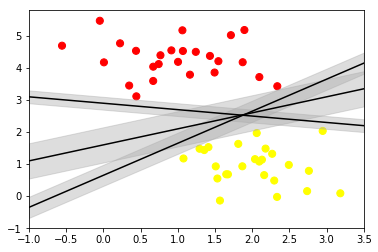

In [21]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

簡而言之，支援向量機就是同時滿足最小分類錯誤，以及最大化邊界的一種算法。

In [22]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

透過支援向量機，我們可以在下面資料中找出一個分類器，他同時符合兩個條件。

1. 有最好的分類效果
2. 有最大的邊界（margin）

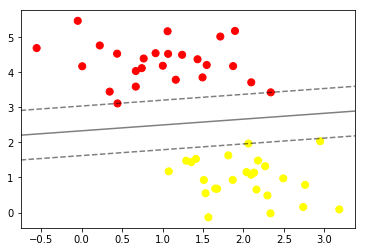

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

可找出支援向量（support vectors）

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

N = 60 :
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
N = 120 :
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


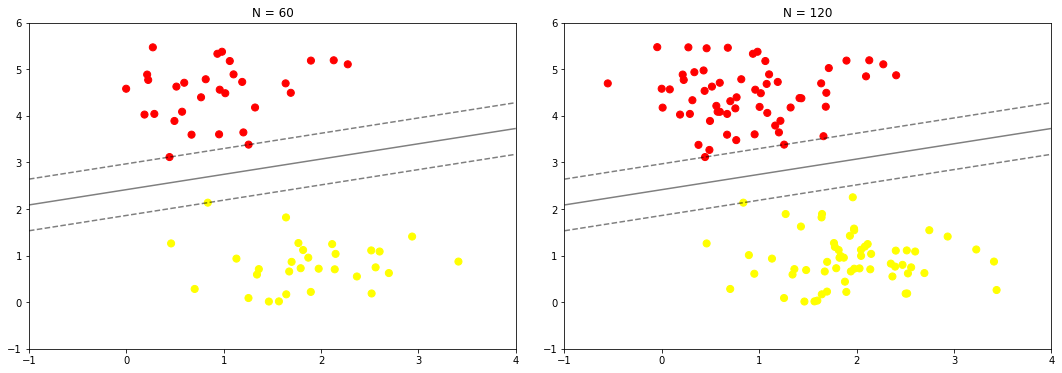

In [38]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    print('N = {0} :\n'.format(N) + str(model.support_vectors_))
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

在支援向量（support vectors）一樣的情況下，做出來的SVM分類器為一樣。

Linear SVC 無法解決非線性的問題。

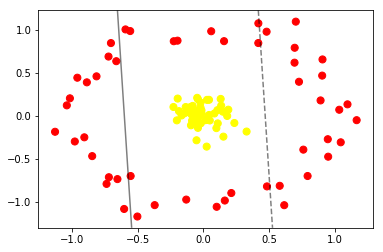

In [39]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

-----
### Kernel SVM 透過將資料投影到高維度來解決非線性的問題。

SVM提供以下Kernel選擇。
linear, poly, rbf, sigmoid, precomputed

以下連結有關kernel介紹。
https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-kernel-%E5%87%BD%E6%95%B8-47c94095171

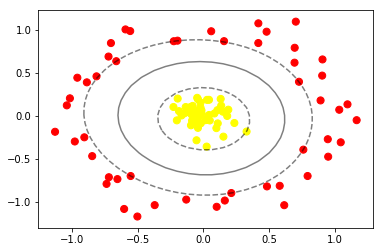

In [40]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

----
#### SVM的參數調教。

現實中資料不可能完美分開，資料必然會有重疊的情況，如下。

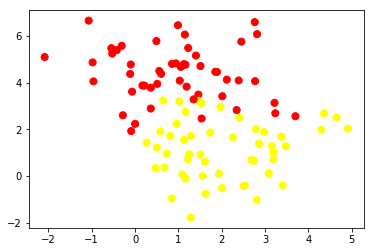

In [11]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

SVM可透過調整參數C，來柔化邊界。當C值越大，邊緣越銳利，反之越柔和。

參數選擇通常靠暴力破解，意即每個都跑跑看，挑最好的。

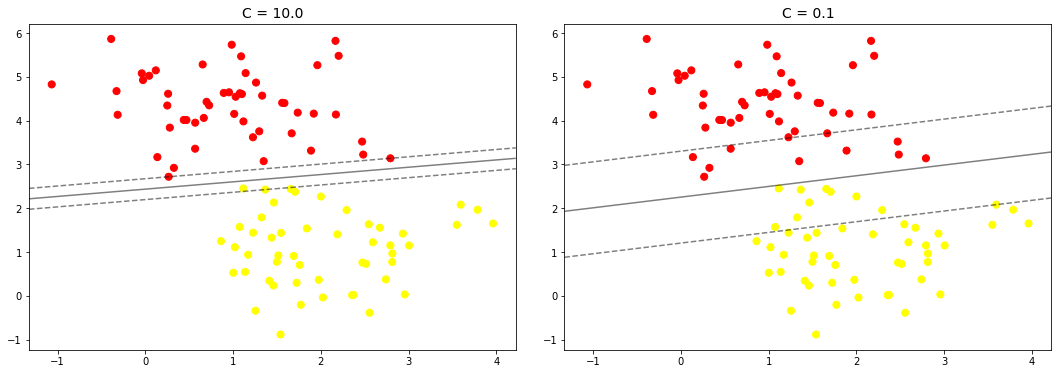

In [41]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

----

### SVM 實作


現在馬上試著將支援向量機應用於人臉辨識。

以下使用Wild資料集中Labeked Faces

In [17]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

使用shape函式了解資料的結構，由此可知圖片資料，

共有1288張圖，每張圖為50*37的矩陣。
每張圖有一個標籤。

print("faces 資料的train_data shape = " + str(faces.images.shape))

print("faces 資料的test_data shape  = " + str(faces.target.shape))

將圖片畫出來，如下

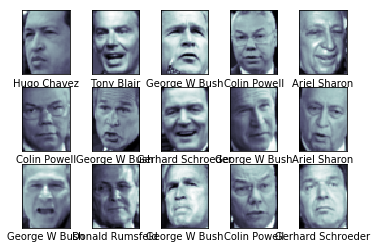

In [49]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

看一下第一張圖資料

faces.images[0]

In [50]:
faces.images[0].shape

(50, 37)

***
看第一個標籤資料

faces.target[0]

SVM 演算法無法處理多維度資料，故需要先將資料轉換為一維資料

使用reshape()函式
將 $ 50*37 $ 矩陣轉換為 1*1850

faces_traindata = faces.images.reshape(-1, 1850 )

faces_traindata.shape

將資料分成訓練資料集和測試資料集。

使用train_test_split()函式

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces_traindata, faces.target, test_size = 0.2, random_state=0)

觀察 Xtrain

len(Xtrain)

1030

## 開始訓練模型！！

訓練模型三步驟

1. 選定你要用的模型

2. 用資料訓練模型

3. 評估模型好壞

from sklearn import svm

lin_clf = svm.LinearSVC(C=1000, random_state=1)#定義你的分類器

lin_clf

lin_clf.fit(Xtrain, ytrain)#資料訓練擬的分類器

模型訓練好了！

將測試資料帶入模型中，產生分類結果。

y_result = lin_clf.predict(Xtest)

評估模型好壞

from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_result)

結果呈現

NameError: name 'y_result' is not defined

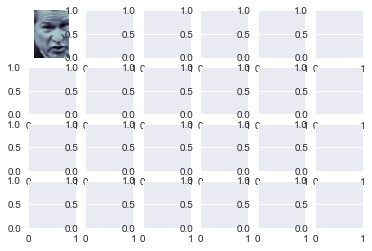

In [20]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(50, 37), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_result[i]].split()[-1],
                   color='black' if y_result[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [215]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_result,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.95      0.80      0.87        25
     Colin Powell       0.77      0.80      0.79        51
  Donald Rumsfeld       0.57      0.68      0.62        19
    George W Bush       0.90      0.86      0.88       104
Gerhard Schroeder       0.55      0.61      0.58        18
      Hugo Chavez       1.00      0.64      0.78        14
       Tony Blair       0.76      0.93      0.83        27

        micro avg       0.81      0.81      0.81       258
        macro avg       0.79      0.76      0.76       258
     weighted avg       0.82      0.81      0.81       258



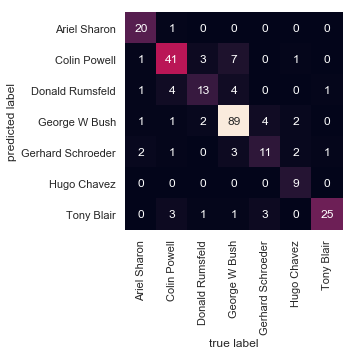

In [216]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(ytest, y_result)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## 調教模型

80%的準確率顯然差強人意，現在透過一些常用的方法來增加模型的準確率。

$\blacksquare$ 數據預處理
規一化\
標準化\
正則化

sklearn.preprocessing提供多種預除理的函式
例如
 scale, MinMaxScaler, StandardScaler,normalize......
 
 https://scikit-learn.org/stable/modules/preprocessing.html
 https://www.youtube.com/watch?v=1YpKUpitT98&list=PLXO45tsB95cIFm8Y8vMkNNPPXAtYXwKin&index=14

-----
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

scaler.fit(faces_traindata)# 將資料最大最小規範到-1到1之間

scaler_faces_traindata = scaler.transform(faces_traindata)

scaler_faces_traindata

將標準化的資料帶入相同的模型中訓練，可得較佳的結果。

X_train, X_test, y_train, y_test = train_test_split(scaler_faces_traindata, faces.target, test_size = 0.2, random_state=0)

lin_clf_scaler = svm.LinearSVC(C=1000, random_state=1)#定義你的分類器

lin_clf_scaler.fit(X_train, y_train)#資料訓練擬的分類器

y_result_s = lin_clf_scaler.predict(X_test)

accuracy_score(y_test, y_result_s)

## 機器學習應用於維度下降（Dimensionality reduction）問題

緯度下降主要有兩種目的

1. 視覺化（visualization），將多維資料資料畫在平面上，將為度降到二維。

2. 特偵萃取 （feature extraction ），保留最大變異數的情況下，減少為度。


#### 主成分分析 Principal Component Analysi (PCA)，原理簡介




In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

創造假資料

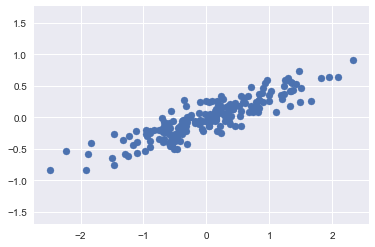

In [8]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

使用 PCA model 擬合

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

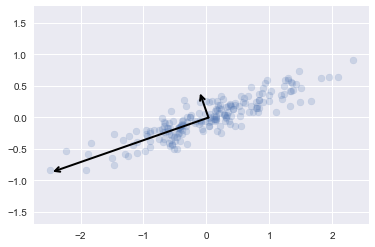

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

簡而言之，PCA會在空間中劃出一條能保留最大變異量的直線，把資料擬合到直線上，使為度下降。

In [15]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


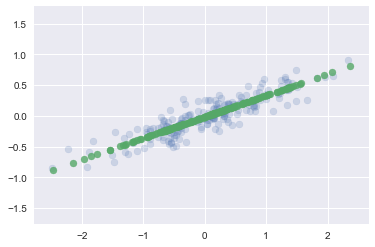

In [16]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

---
回到人臉問題，嘗試進行特真萃取，與視覺化。

pca= PCA(n_components=150, svd_solver='randomized',whiten=True)

pca = pca.fit(Xtrain)

X_train_pca = pca.transform(Xtrain)

X_test_pca = pca.transform(Xtest)

X_train_pca.shape

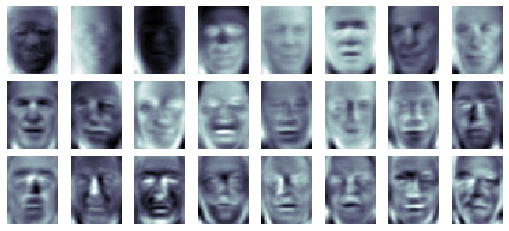

In [22]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(50, 37), cmap='bone')

如何決定特真萃取時降維數。

pca.explained_variance_ratio_

In [24]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

NameError: name 'X_train' is not defined

svc = svm.SVC(C=10, kernel='rbf',gamma =0.005)

svc_fit = svc.fit(X_train_pca, y_train)

y_model = svc_fit.predict(X_test_pca)

accuracy_score(y_test, y_model)

----
嘗試把資料壓到2維平面視覺化。


pca= PCA(n_components=2, svd_solver='randomized',whiten=True)

pca = pca.fit(faces_traindata)

faces_traindata_pca = pca.transform(faces_traindata)

faces_traindata_pca.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.scatter(faces_traindata_pca[:, 0], faces_traindata_pca[:, 1],
            c= faces.target, edgecolor='none', alpha=0.5,)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

----
找到最佳參數的做法，其實就是一個一個試。

使用 GridSearchCV 函式

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],

              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf = GridSearchCV(svc_fit, param_grid, cv=5, iid=False)

clf = clf.fit(X_train_pca, y_train)

print(clf.best_estimator_)

y_result_s = clf.predict(X_test_pca)

accuracy_score(ytest, y_result_s)

------
Feature Pipelines

將算式整理再一起。

from sklearn.pipeline import make_pipeline

model = make_pipeline(MinMaxScaler(feature_range=(-1, 1)),
                      
                      PCA(n_components=150, svd_solver='randomized',whiten=True),
                      
                      SVC(C=10, gamma=0.005, kernel='rbf'))

X_train, X_test, y_train, y_test = train_test_split(faces_traindata, faces.target, test_size = 0.2, random_state=0)

model.fit(X_train,y_train)

result = model.predict(X_test) 

accuracy_score(y_test, result)

-------
保存模型

joblib.dump()

from sklearn.externals import joblib

joblib.dump(model, "./train_model.m")

調用模型

joblib.load()

model_load = joblib.load("./train_model.m")

-----
###  隨機森林(Random Forest)，原理簡介。

隨機森林是一種整體學習法(Ensemble learning)，藉由bagging的集成方法，集成多個決策樹(Decision Tree)的結果，來達到比單一決策樹較好的效果。

我們分別先介紹
* bagging

* 決策樹(Decision Tree)


### 整體學習法(Ensemble learning)
透過對訓練資料的不同取樣，產生多個決策器，將每個決策器的結果進行投票，決定最後結果(回歸問題則取平均值)。

* 整體學習法兩要點。
 1. 決策器間須有差異
 2. 決策器不能太差(準確率不能低於0.5)
 
 
* 整體學習法選用。

Bagging : 是Bootstrap aggregating的縮寫，又稱裝袋算法，在抽取訓練樣本的部份採用了Bootstrap方法，其特色在於藉由重複取樣及多模型預測來改善training accuracy

Boosting : 同樣都是基於Bootstrap的抽樣方法，但Boosting針對分類錯誤的資料增加其權重後再次學習，隨著運算過程Boosting會著重於錯誤率的重新採樣，那些分類錯誤的data會受到較多的重視並重複的訓練。

https://chtseng.wordpress.com/2019/03/02/ensemble-learning-%E8%88%87-deep-learning/

bagging可否和svm連用?

In [258]:
from sklearn.ensemble import BaggingClassifier

svm_clf = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
          decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
          max_iter=-1, probability=False, random_state=None, shrinking=True,
          tol=0.001, verbose=False)  #定義你要bagging的model

bag = BaggingClassifier(svm_clf,#bagging的model
                        n_estimators=30,#要產生多少個model
                        max_samples=0.8,#每個model取樣的比率
                        random_state=1)#定義你的BaggingClassifier

bag = bag.fit(X_train_pca, y_train)


y_result_s = bag.predict(X_test_pca)
accuracy_score(ytest, y_result_s)

0.8178294573643411

### 決策樹(Decision Tree)

決策樹是一個非常直覺的方法，將資料依某一個維度拆分成是或否，將資料分開。然而選哪個維度、拆分的比例則透過墒值或吉尼係數的計算決定，詳細看下方連結。

https://chtseng.wordpress.com/2017/02/10/%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-trees/

[0, 1, 0, 1]

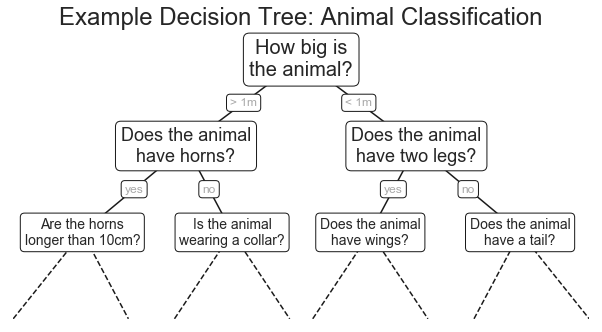

In [192]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Example Decision Tree: Animal Classification', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "How big is\nthe animal?", 20)
text(ax, 0.3, 0.6, "Does the animal\nhave horns?", 18)
text(ax, 0.7, 0.6, "Does the animal\nhave two legs?", 18)
text(ax, 0.12, 0.3, "Are the horns\nlonger than 10cm?", 14)
text(ax, 0.38, 0.3, "Is the animal\nwearing a collar?", 14)
text(ax, 0.62, 0.3, "Does the animal\nhave wings?", 14)
text(ax, 0.88, 0.3, "Does the animal\nhave a tail?", 14)

text(ax, 0.4, 0.75, "> 1m", 12, alpha=0.4)
text(ax, 0.6, 0.75, "< 1m", 12, alpha=0.4)

text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.34, 0.45, "no", 12, alpha=0.4)

text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.79, 0.45, "no", 12, alpha=0.4)

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--k')
ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
ax.axis([0, 1, 0, 1])

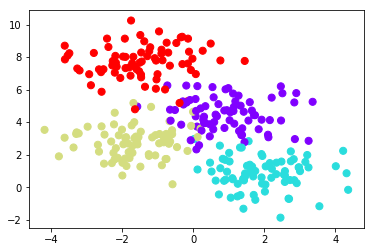

In [5]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [6]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

決策樹的分類情況

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


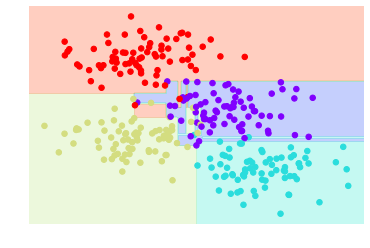

In [7]:
visualize_classifier(DecisionTreeClassifier(), X, y)

決策森林的分類情況

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()

bag = BaggingClassifier(tree,
                        n_estimators=100,#要產生多少個model
                        max_samples=0.8,#每個model取樣的比率
                        random_state=1)

bag.fit(X, y)

visualize_classifier(bag, X, y)

可以直接掉用RandomForestClassifier函式

參數調教

可以調整每個分類項最少樣本數，來控制overfitting，稱為剪枝。


min_samples_leaf:葉子節點最少樣本數。
    

In [ ]:
----
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,#要產生多少個model

                               min_samples_leaf = 10)#每個分類項最少樣本數

model.fit(X, y)

visualize_classifier(model, X, y)

----
回到人臉辨識試驗

#Xtrain, Xtest, ytrain, ytest

RandomForest_model = RandomForestClassifier(n_estimators=10,#要產生多少個model

                              min_samples_leaf = 20)#每個分類項最少樣本數

RandomForest_model = RandomForest_model.fit(X_train_pca, y_train)

y_model = RandomForest_model.predict(X_test_pca)

accuracy_score(y_test, y_model)


----
CNN 類神經模型

In [332]:
from keras.models import Sequential  #用來啟動 NN
from keras.layers import Conv2D  # Convolution Operation
from keras.layers import MaxPooling2D # Pooling
from keras.layers import Flatten
from keras.layers import Dense # Fully Connected Network

In [329]:
print("faces 資料的train_data shape = " + str(faces.images.shape))
print("faces 資料的test_data shape  = " + str(faces.target.shape))

faces 資料的train_data shape = (1288, 50, 37)
faces 資料的test_data shape  = (1288,)


Xtrain, Xtest, ytrain, ytest = train_test_split(faces.images, faces.target, test_size = 0.2, random_state=0)

y = pd.get_dummies(ytrain)

x = Xtrain.reshape(-1,50,37,1)


fit_epochs =30

fit_batch_size = 5

fit_validation_split = 0.2

model = Sequential()  

model.add(Conv2D(32, 3, 3, input_shape = (50, 37, 1), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, 3, 3, activation = 'relu'))# Second convolutional layer

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, 3, 3, activation = 'relu'))# Third convolutional layer

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(output_dim = 128, activation = 'relu'))

model.add(Dense(output_dim = 7, activation = 'sigmoid'))

print(model.summary())


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


train_history = model.fit(x=x, 

                          y=y,

                          validation_split=fit_validation_split,
                          
                          epochs=fit_epochs, 
                          
                          batch_size=fit_batch_size, 
                          
                          verbose=2)

In [377]:
result = model.predict(Xtest.reshape(-1,50,37,1))
result

array([[2.3080315e-04, 8.6692482e-01, 2.6480850e-08, ..., 2.1604492e-07,
        2.5462002e-01, 1.1282426e-05],
       [9.8191267e-03, 5.3203445e-07, 2.1336782e-06, ..., 6.3059136e-02,
        1.4105452e-03, 9.7865671e-01],
       [2.8422016e-03, 4.1228645e-02, 9.7676283e-01, ..., 8.8791484e-07,
        1.2005232e-09, 3.6203571e-02],
       ...,
       [4.7504932e-06, 4.5110933e-09, 3.1265920e-06, ..., 8.7896595e-08,
        7.2030404e-10, 1.1561082e-08],
       [1.1216834e-05, 1.2484075e-05, 2.8903608e-07, ..., 7.8974765e-08,
        7.3289888e-13, 1.0802469e-09],
       [2.1272833e-02, 1.6814019e-01, 4.3319338e-03, ..., 1.0022216e-02,
        1.1369906e-02, 8.0364186e-01]], dtype=float32)

In [387]:
result2 = list(map(lambda x: x==max(x), result)) * np.ones(shape=result.shape)

result2 = pd.DataFrame(result2)

result3 = pd.get_dummies(result2).idxmax(1)

In [389]:
accuracy_score(y_test, result3)

0.748062015503876

練習題

練習使用svm與randomforest於手寫辨識資料集（digits）中

In [4]:
from sklearn import datasets
digits = datasets.load_digits()